In [11]:
import tensorflow as tf
import mnist 
import matplotlib.pyplot as plt
from keras.models import Sequential #ANN 
from keras.layers import Dense #layers of ANN
from keras.utils import to_categorical

In [118]:
#Load in trainging and testing dataset
train_images = mnist.train_images() 
train_labels = mnist.train_labels() 
test_images = mnist.test_images() 
test_labels = mnist.test_labels()

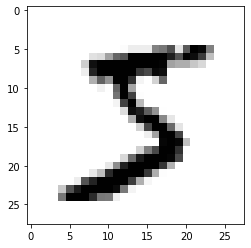

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [47]:
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()
print(train_images[0])

In [117]:
#preporcess data. 
#Flatten images
train_images = train_images.reshape((-1,784)) #60k x 784
test_images = test_images.reshape((-1,784)) #10k x 784

In [96]:
#Build model: 3 layers, 2 layers with 16 neurons and relu function 
#1 layer with 10 neurons and softmax function. 
model = Sequential()
model.add(Dense(16,activation=tf.nn.relu))
model.add(Dense(16,activation=tf.nn.relu))
model.add(Dense(10,activation = tf.nn.softmax))

In [97]:
#Compile the model: optimizer and loss function
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', #(classes that are greater than 2)
    metrics = ['accuracy']
)

In [98]:
#Finally train the model
model.fit(
    train_images,
    to_categorical(train_labels), #returns 2 and it expects [0,0,2,0,0,0,0,0,0]
    epochs = 5,
    batch_size=32, 
)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 2.6172 - accuracy: 0.3418
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 1.2009 - accuracy: 0.5586
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.8573 - accuracy: 0.6838
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.6994 - accuracy: 0.7542
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.5232 - accuracy: 0.8557


In [75]:
#Seems like there is something wrong with my model
#accuary gets stuck at .1124
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 14us/step


[0.21656125102341175, 0.9350000023841858]

In [77]:
#Try beating a 94% accuary
#Try Normalizing data the pixel values from 0,255 to -0.5,0.5
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)

In [79]:
model = Sequential()
model.add(Dense(16,activation=tf.nn.relu))
model.add(Dense(16,activation=tf.nn.relu))
model.add(Dense(10,activation = tf.nn.softmax))

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', #(classes that are greater than 2)
    metrics = ['accuracy']
)
model.fit(
    train_images,
    to_categorical(train_labels), #returns 2 and it expects [0,0,2,0,0,0,0,0,0]
    epochs = 5,
    batch_size=32, 
)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.6594 - accuracy: 0.8109
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3140 - accuracy: 0.9091 0s - loss: 0.3148 - accuracy: 0.90
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2709 - accuracy: 0.9216 1s - l - ETA: 0s - loss: 0.2751 - ac
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2444 - accuracy: 0.9288
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2253 - accuracy: 0.9339


In [81]:
#seemd liked normazling data did not have much of an effect
#This time I will double the number of neurons in each layer
model = Sequential()
model.add(Dense(32,activation=tf.nn.relu))
model.add(Dense(32,activation=tf.nn.relu))
model.add(Dense(10,activation = tf.nn.softmax))

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', #(classes that are greater than 2)
    metrics = ['accuracy']
)
model.fit(
    train_images,
    to_categorical(train_labels), #returns 2 and it expects [0,0,2,0,0,0,0,0,0]
    epochs = 5,
    batch_size=32, 
)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.4958 - accuracy: 0.8653
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2410 - accuracy: 0.9291
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1965 - accuracy: 0.9416
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1688 - accuracy: 0.9505 0s - loss: 0 - ETA: 0s - loss: 0.1706 - ac
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1478 - accuracy: 0.9560


In [102]:
#Seemed like it had it helped, will double again and also double epochs
#seemd liked normazling data did not have much of an effect
#This time I will double the number of neurons in each layer
model = Sequential()
model.add(Dense(64,activation=tf.nn.relu))
model.add(Dense(64,activation=tf.nn.relu))
model.add(Dense(10,activation = tf.nn.softmax))

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', #(classes that are greater than 2)
    metrics = ['accuracy']
)
model.fit(
    train_images,
    to_categorical(train_labels), #returns 2 and it expects [0,0,2,0,0,0,0,0,0]
    epochs = 10,
    batch_size=32, 
)

Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 1.3692 - accuracy: 0.8287
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3626 - accuracy: 0.9093
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2846 - accuracy: 0.9283
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2493 - accuracy: 0.9350
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2035 - accuracy: 0.9464
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1797 - accuracy: 0.9521
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1590 - accuracy: 0.9568
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1481 - accuracy: 0.9590
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1351 - accuracy: 0.9622
Epoch 10/10
60000/60000 [==============================

In [104]:
val_loss, val_acc = model.evaluate(test_images,to_categorical(test_labels))
print(val_loss,val_acc)
#about 95% accuaracy 

10000/10000 [==============================] - 0s 20us/step
0.20033070752583443 0.9520000219345093


In [109]:
predictions = model.predict([test_images])

In [110]:
print(predictions)

[[2.7772734e-10 5.5997746e-12 3.0557471e-06 ... 9.9999607e-01
  4.1424922e-10 2.7106530e-09]
 [1.9245189e-11 2.8405493e-05 9.9992311e-01 ... 1.2576513e-05
  2.2375092e-07 3.0234200e-09]
 [2.3005035e-07 9.9999976e-01 2.5119993e-12 ... 1.0373284e-13
  8.9263006e-09 5.3253138e-19]
 ...
 [8.2069615e-11 3.9343749e-06 1.6493968e-07 ... 6.1063724e-06
  5.3904475e-10 1.0516188e-05]
 [2.5076050e-35 5.8059613e-36 5.6519088e-25 ... 7.8183006e-26
  5.1438751e-21 2.4395810e-38]
 [1.7999922e-18 3.1700401e-29 4.1442146e-18 ... 2.5786097e-30
  2.2977960e-24 0.0000000e+00]]


In [111]:
print(np.argmax(predictions[0]))

7


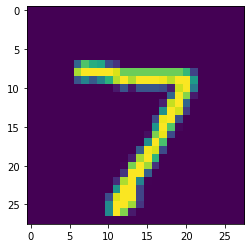

In [119]:
a = np.expand_dims(test_images[0], axis=1)
plt.imshow(test_images[0])
plt.show()